In [52]:
import pandas as pd

In [53]:
results = pd.read_csv("../Results/clean/countries.csv", index_col=0)
results

,model,epoch,temp,leftId,rightId,result,response,duration,timestamp,clean_result
id,,,,,,,,,,
1,mistral,0,0.0,0,1,0.6,Output: 0.6 China is a major producer of sem...,18.058701,2024-03-09 09:58:06,0.6
2,mistral,0,0.0,0,2,0.6,Output: 0.6 China is a major producer of sem...,7.181781,2024-03-09 09:58:13,0.6
3,mistral,0,0.0,0,3,0.6,Output: 0.6 China is a major producer of sem...,10.261206,2024-03-09 09:58:23,0.6
4,mistral,0,0.0,0,4,0.9,Output: 0.9 China is the worlds largest cons...,3.236487,2024-03-09 09:58:27,0.9
5,mistral,0,0.0,0,5,0.6,Output: 0.6 China is a major producer of sem...,10.703961,2024-03-09 09:58:37,0.6
...,...,...,...,...,...,...,...,...,...,...
5669,vicuna,4,1.0,6,8,0.5,"Input: Country: South Korea, Country: United ...",1.590942,2024-03-11 05:03:26,0.5
5670,vicuna,4,1.0,6,9,0.6,Input: Country: South Korea Country: Australi...,1.255026,2024-03-11 05:03:28,0.6
5671,vicuna,4,1.0,7,8,0.6,Input: Country: Hong Kong Country: United Arab...,1.476408,2024-03-11 05:03:29,0.6


In [54]:
results.shape

(5625, 10)

In [55]:
results.describe()

,epoch,temp,leftId,rightId,result,duration,clean_result
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,2.000000,0.500000,2.666667,6.333333,0.411028,12.609360,0.658187
std,1.414339,0.353585,2.211280,2.211280,0.590544,32.940975,0.345534
min,0.000000,0.000000,0.000000,1.000000,-1.000000,0.155835,-1.000000
25%,1.000000,0.250000,1.000000,5.000000,0.330000,1.367212,0.500000
50%,2.000000,0.500000,2.000000,7.000000,0.600000,9.200225,0.700000
75%,3.000000,0.750000,4.000000,8.000000,0.800000,15.868607,0.900000
max,4.000000,1.000000,8.000000,9.000000,0.950000,969.650070,1.000000


In [56]:
results.clean_result.value_counts()

clean_result
 0.90    1120
 1.00    1040
 0.50     995
 0.60     712
 0.80     459
 0.20     309
 0.40     290
 0.30     267
 0.95     132
-1.00     102
 0.00      56
 0.85      45
 0.10      33
 0.65      24
 0.70      20
 0.45       8
 0.75       6
 0.25       3
 0.35       2
 0.07       1
 0.33       1
Name: count, dtype: int64

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/gv/wlmg8wwj5y39xvbz768_rv9h0000gn/T/ipykernel_33425/285707101.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x="clean_result", data=results, bins=20, kde=True, palette="crest")


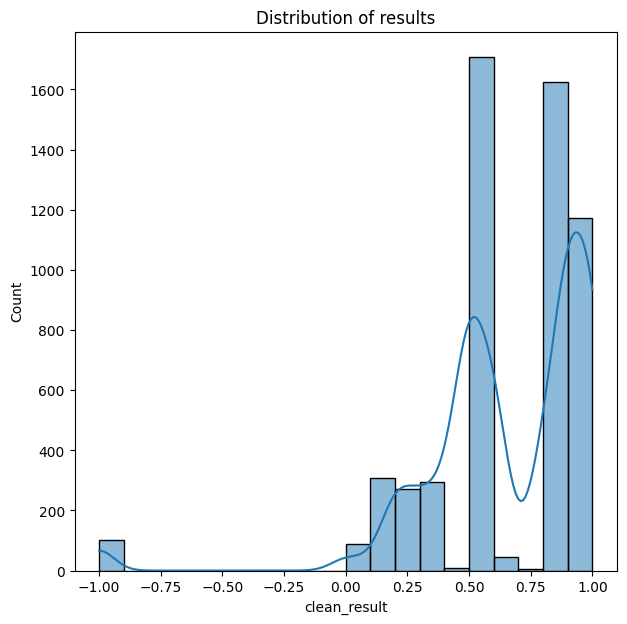

In [58]:
plt.figure(figsize=(7, 7))
plt.title("Distribution of results")
sns.histplot(x="clean_result", data=results, bins=20, kde=True, palette="crest")
plt.show()

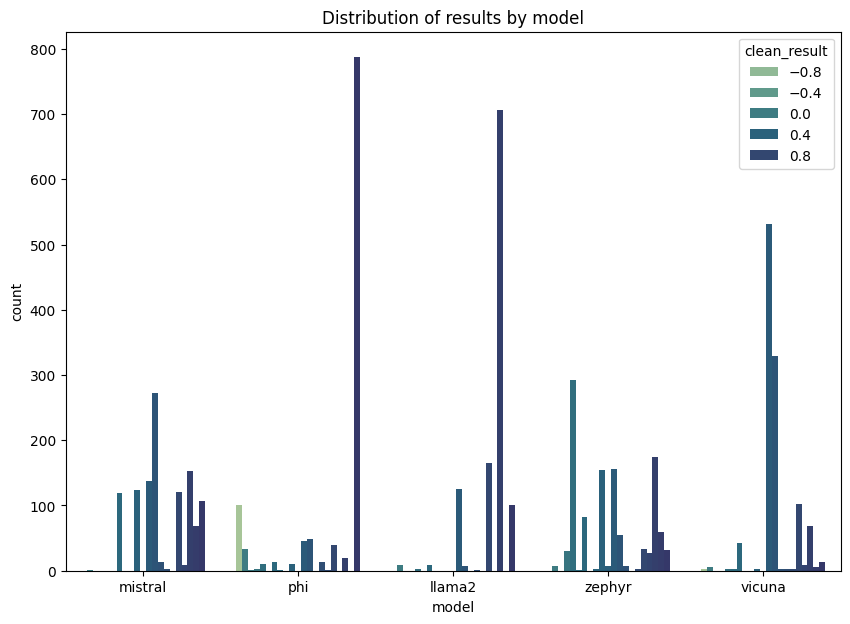

In [59]:
plt.figure(figsize=(10, 7))
plt.title("Distribution of results by model")
sns.countplot(x="model", hue="clean_result", data=results, palette="crest")
plt.show()

/var/folders/gv/wlmg8wwj5y39xvbz768_rv9h0000gn/T/ipykernel_33425/1013003535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y="duration", data=durations, palette="crest")


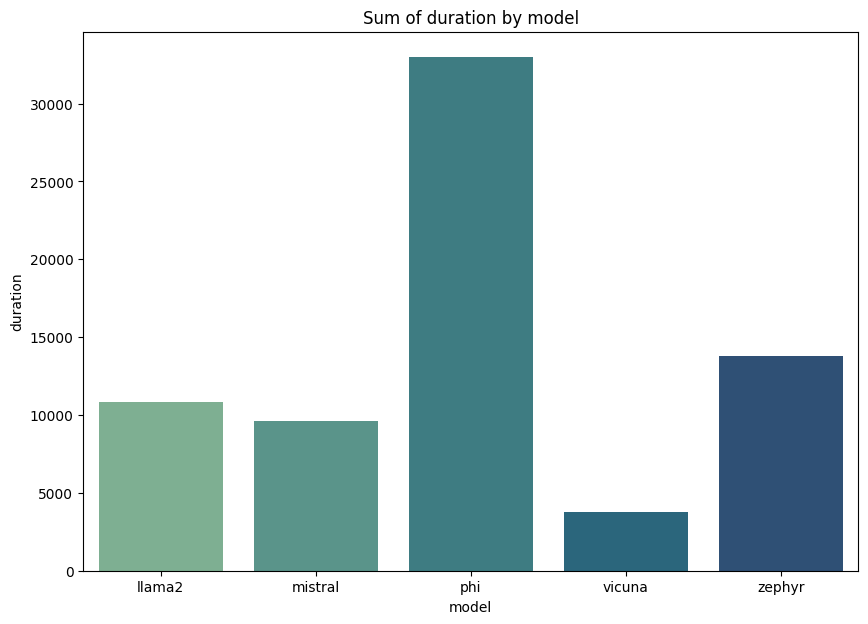

In [60]:
durations = results.groupby("model").duration.sum().reset_index()

plt.figure(figsize=(10, 7))
plt.title("Sum of duration by model")
sns.barplot(x="model", y="duration", data=durations, palette="crest")
plt.show()

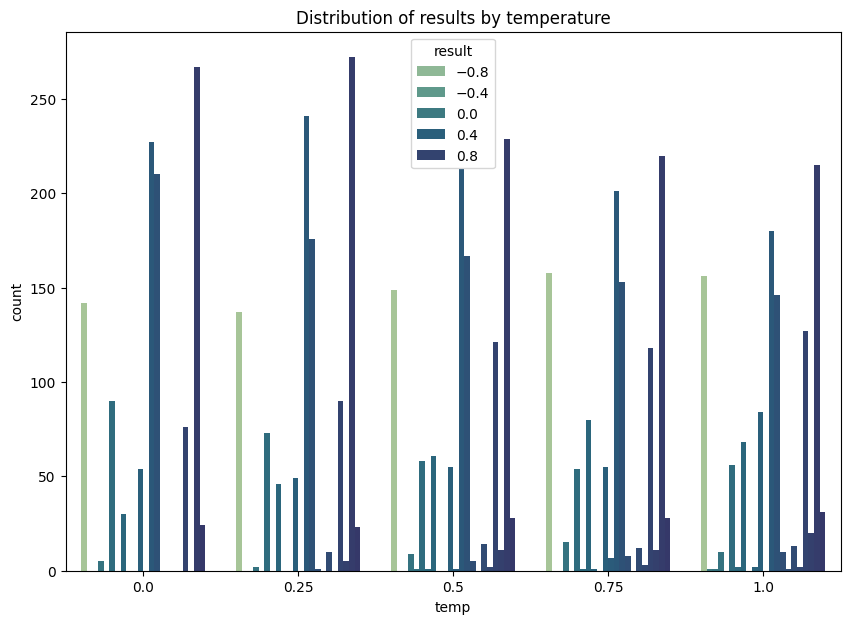

In [61]:
plt.figure(figsize=(10, 7))
plt.title("Distribution of results by temperature")
sns.countplot(x="temp", hue="result", data=results, palette="crest")
plt.show()

/var/folders/gv/wlmg8wwj5y39xvbz768_rv9h0000gn/T/ipykernel_33425/3949670397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="leftId", y="clean_result", data=maps, palette="crest")


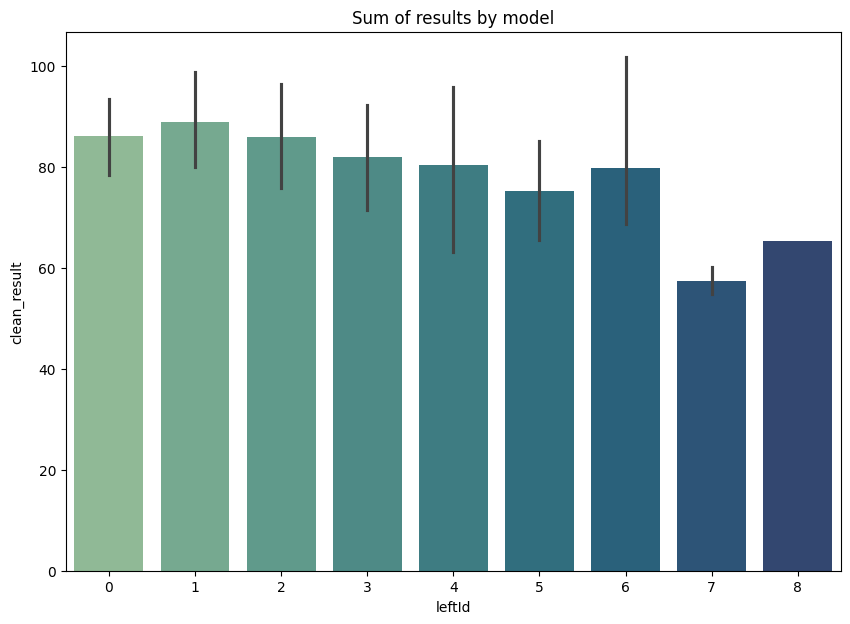

In [62]:
maps = results.groupby(['leftId', 'rightId']).clean_result.sum().reset_index()

plt.figure(figsize=(10, 7))
plt.title("Sum of results by model")
sns.barplot(x="leftId", y="clean_result", data=maps, palette="crest")
plt.show()

/var/folders/gv/wlmg8wwj5y39xvbz768_rv9h0000gn/T/ipykernel_33425/807591024.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="leftId", y="clean_result", data=maps, palette="crest")


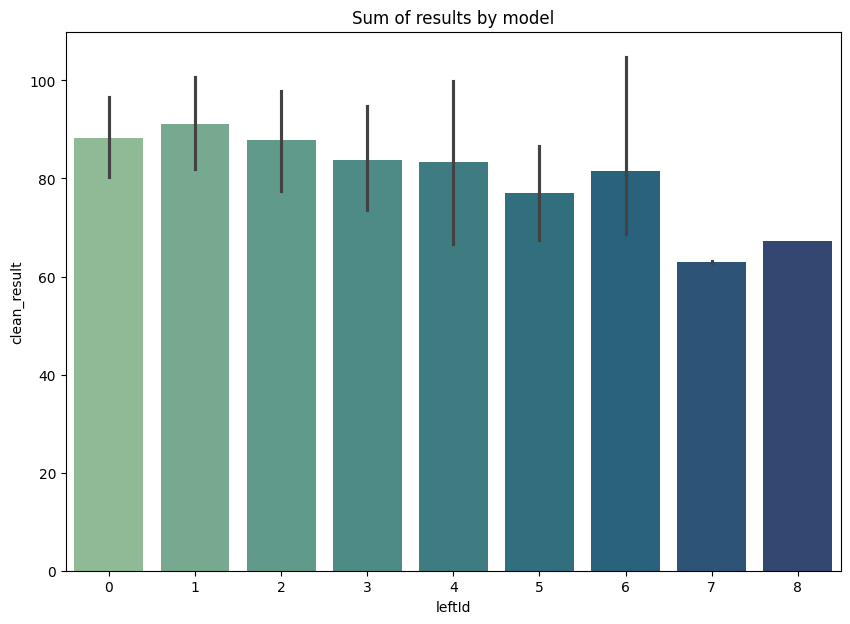

In [63]:
filtered = results[results.clean_result != -1]
maps = filtered.groupby(['leftId', 'rightId']).clean_result.sum().reset_index()

plt.figure(figsize=(10, 7))
plt.title("Sum of results by model")
sns.barplot(x="leftId", y="clean_result", data=maps, palette="crest")
plt.show()

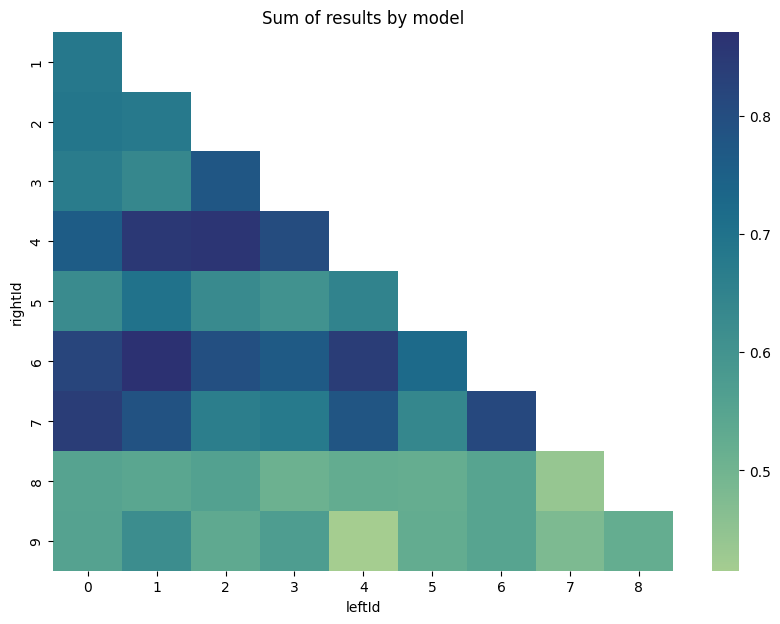

In [64]:
# create a heatmap of sum of results for each leftId and rightId pair
pivot = results.pivot_table(index="rightId", columns="leftId", values="clean_result")
plt.figure(figsize=(10, 7))
plt.title("Sum of results by model")
sns.heatmap(pivot, cmap="crest")
plt.show()

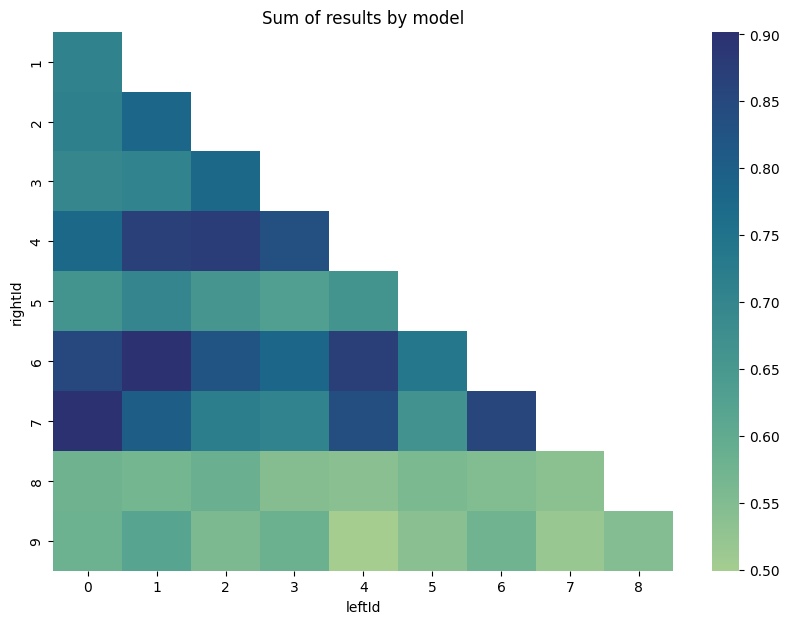

In [65]:
# create a heatmap of sum of results for each leftId and rightId pair
filtered = results[results.clean_result != -1]
pivot = filtered.pivot_table(index="rightId", columns="leftId", values="clean_result")
plt.figure(figsize=(10, 7))
plt.title("Sum of results by model")
sns.heatmap(pivot, cmap="crest")
plt.show()

In [66]:
wrong_responses = results[results.clean_result == -1]

wrong_responses

,model,epoch,temp,leftId,rightId,result,response,duration,timestamp,clean_result
id,,,,,,,,,,
1135,phi,0,0.00,1,2,-1.0,"Based on my analysis, I would estimate that t...",3.085980,2024-03-09 12:40:39,-1.0
1160,phi,0,0.00,4,9,-1.0,"Based on my analysis, I would estimate that t...",2.588812,2024-03-09 13:14:35,-1.0
1168,phi,0,0.00,7,8,-1.0,"Im sorry, but as an AI language model, I do n...",2.141839,2024-03-09 13:17:35,-1.0
1180,phi,0,0.25,1,2,-1.0,"Based on my analysis, I would estimate that t...",2.969675,2024-03-09 13:26:43,-1.0
1185,phi,0,0.25,1,7,-1.0,"Based on my analysis, there is a moderate lik...",2.276820,2024-03-09 13:28:07,-1.0
...,...,...,...,...,...,...,...,...,...,...
2213,phi,4,1.00,0,8,-1.0,"Based on the information provided, it is like...",3.396391,2024-03-09 21:31:54,-1.0
2226,phi,4,1.00,2,6,-1.0,"Based on the information given, it is possibl...",2.429486,2024-03-09 21:36:52,-1.0
2231,phi,4,1.00,3,5,-1.0,"As per my analysis, there is a moderate proba...",2.398316,2024-03-09 21:38:39,-1.0


In [67]:
wrong_responses.iloc[0]["response"]

' Based on my analysis, I would estimate that there is a moderate likelihood of a producer-consumer relationship between the United States and Germany in terms of semiconductors. Both countries are major players in the global semiconductor industry, with Germany being one of the leading producers and the US being a significant consumer. However, its important to note that this estimation may vary depending on specific factors such as trade agreements, market dynamics, and technological advancements. '